# Question 2
## Answering analysis questions: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap


In [ ]:
covid_data = pd.read_csv('data.csv')


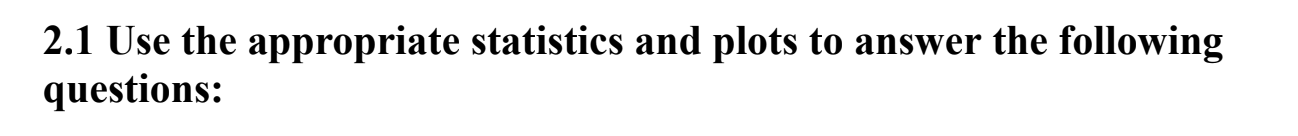


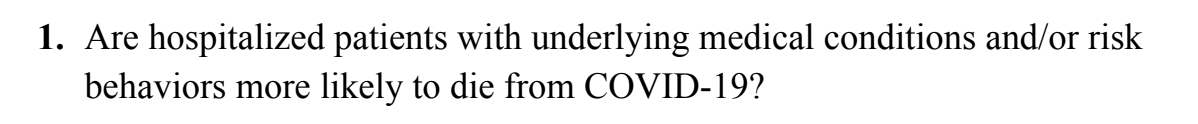

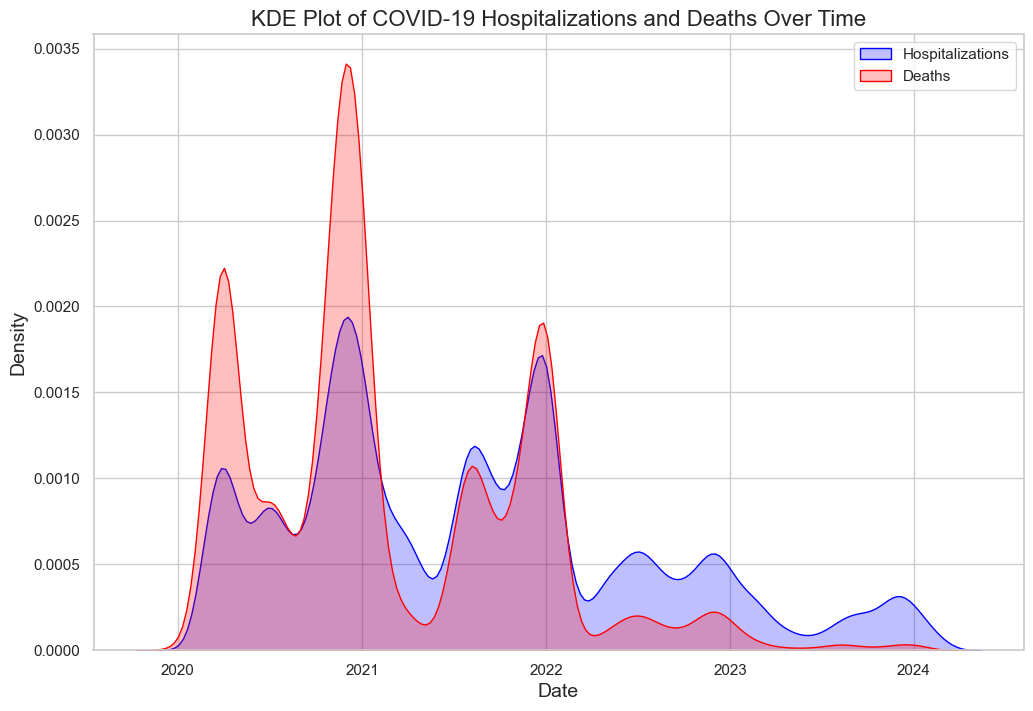

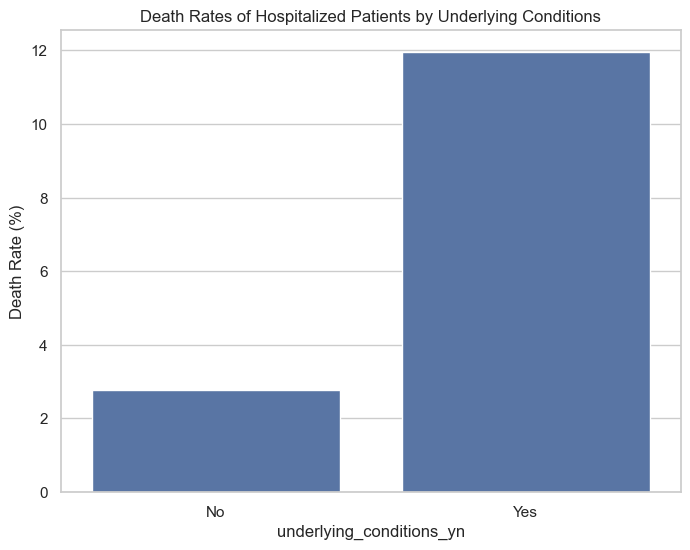

In [ ]:
covid_data['case_month'] = pd.to_datetime(covid_data['case_month'])
covid_data['month_year'] = covid_data['case_month'].dt.to_period('M').astype(str)
hospitalizations = covid_data[covid_data['hosp_yn'] == 'Yes']
deaths = covid_data[covid_data['death_yn'] == 'Yes']
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(hospitalizations['case_month'], label='Hospitalizations', ax=ax, color='blue', fill=True)
sns.kdeplot(deaths['case_month'], label='Deaths', ax=ax, color='red', fill=True)
ax.set_title('KDE Plot of COVID-19 Hospitalizations and Deaths Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend()
plt.show()


hospitalized_data = covid_data[covid_data['hosp_yn'] == 'Yes']

# Group data by underlying conditions and calculate death rates
underlying_conditions_stats = hospitalized_data.groupby('underlying_conditions_yn').agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='death_yn', aggfunc='count')
).reset_index()

underlying_conditions_stats['death_rate'] = (underlying_conditions_stats['death_count'] / underlying_conditions_stats['total_count']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=underlying_conditions_stats, x='underlying_conditions_yn', y='death_rate', ax=ax)

ax.set_ylabel('Death Rate (%)')
ax.set_title('Death Rates of Hospitalized Patients by Underlying Conditions')

plt.show()

<h2>Are hospitalized patients with underlying medical conditions and/or risk
behaviors more likely to die from COVID-19?
</h2>
We can note that the peaks of the plot of hospitalized patients with confirmed underlying medical conditions are the same, or peak at the same time frame, as in the death rate distribution, especially between 2020 to 2021. Also we can note how significant the difference  is between the average death rate of hospitalized patients with underlying medical conditions and that of those who don’t. From this we can say yes, they are more likely to die from COVID-19.


<h2>Who are the people (the demographic segment) that appear to be most at
risk of death due to COVID-19? Who is the least at risk?</h2>

In [ ]:
df = pd.read_csv("/Users/mohamedghaith/Documents/Uni/Stat/Project/data.csv", 
                usecols=["age_group", "death_yn", "sex", "race", "case_month"],
                dtype={"age_group": "category", "death_yn": "category",
                        "sex": "category", "race":"category", "case_month": "category"})

df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["sex"] != "Unknown") & (df["sex"] != "Missing") & (df["sex"] != "Other")]
df = df[(df["race"] != "Unknown") & (df["race"] != "Missing")]
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["sex"] = df["sex"].cat.remove_unused_categories()
df["race"] = df["race"].cat.remove_unused_categories()
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()


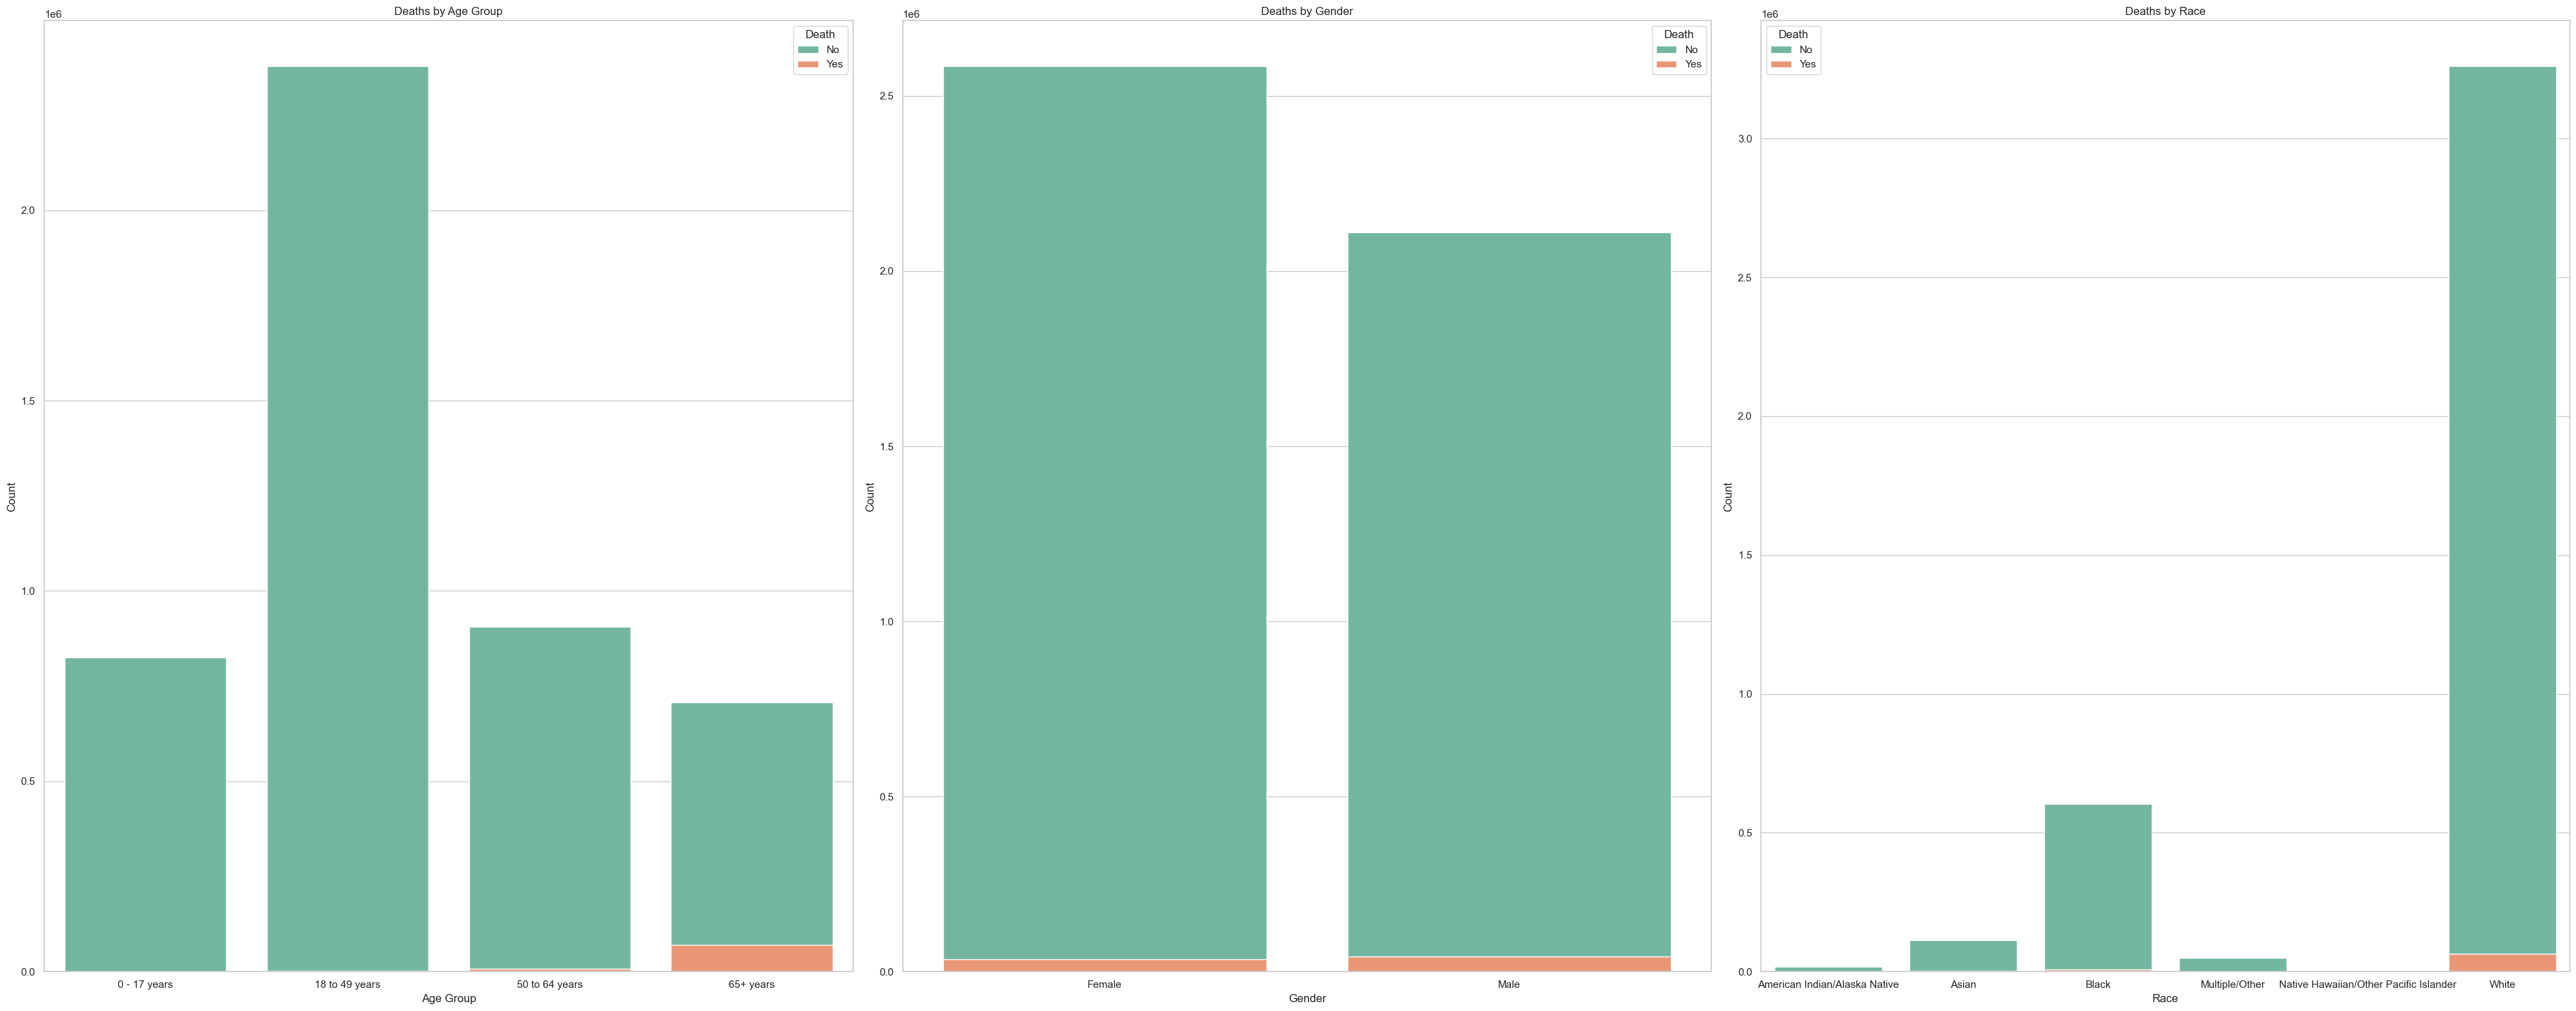

In [ ]:
age_group_data = df.groupby(['age_group', 'death_yn']).size().reset_index(name='count')
sex_data = df.groupby(['sex', 'death_yn']).size().reset_index(name='count')
race_data = df.groupby(['race', 'death_yn']).size().reset_index(name='count')

fig, axes = plt.subplots(1, 3, figsize=(38, 15))


sns.barplot(data=age_group_data, x='age_group', y='count', hue='death_yn', palette='Set2', ax=axes[0], dodge=False)
axes[0].set_title('Deaths by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Death')

# Plot 2: Deaths by Gender
sns.barplot(data=sex_data, x='sex', y='count', hue='death_yn', palette='Set2', ax=axes[1], dodge=False)
axes[1].set_title('Deaths by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].legend(title='Death')

# Plot 3: Deaths by Race
sns.barplot(data=race_data, x='race', y='count', hue='death_yn', palette='Set2', ax=axes[2], dodge=False)
axes[2].set_title('Deaths by Race')
axes[2].set_xlabel('Race')
axes[2].set_ylabel('Count')
axes[2].legend(title='Death')

plt.tight_layout()
plt.show()

<mark><b>From the stacked barplot for each specified demogarphic category We can note the following:</b></mark>
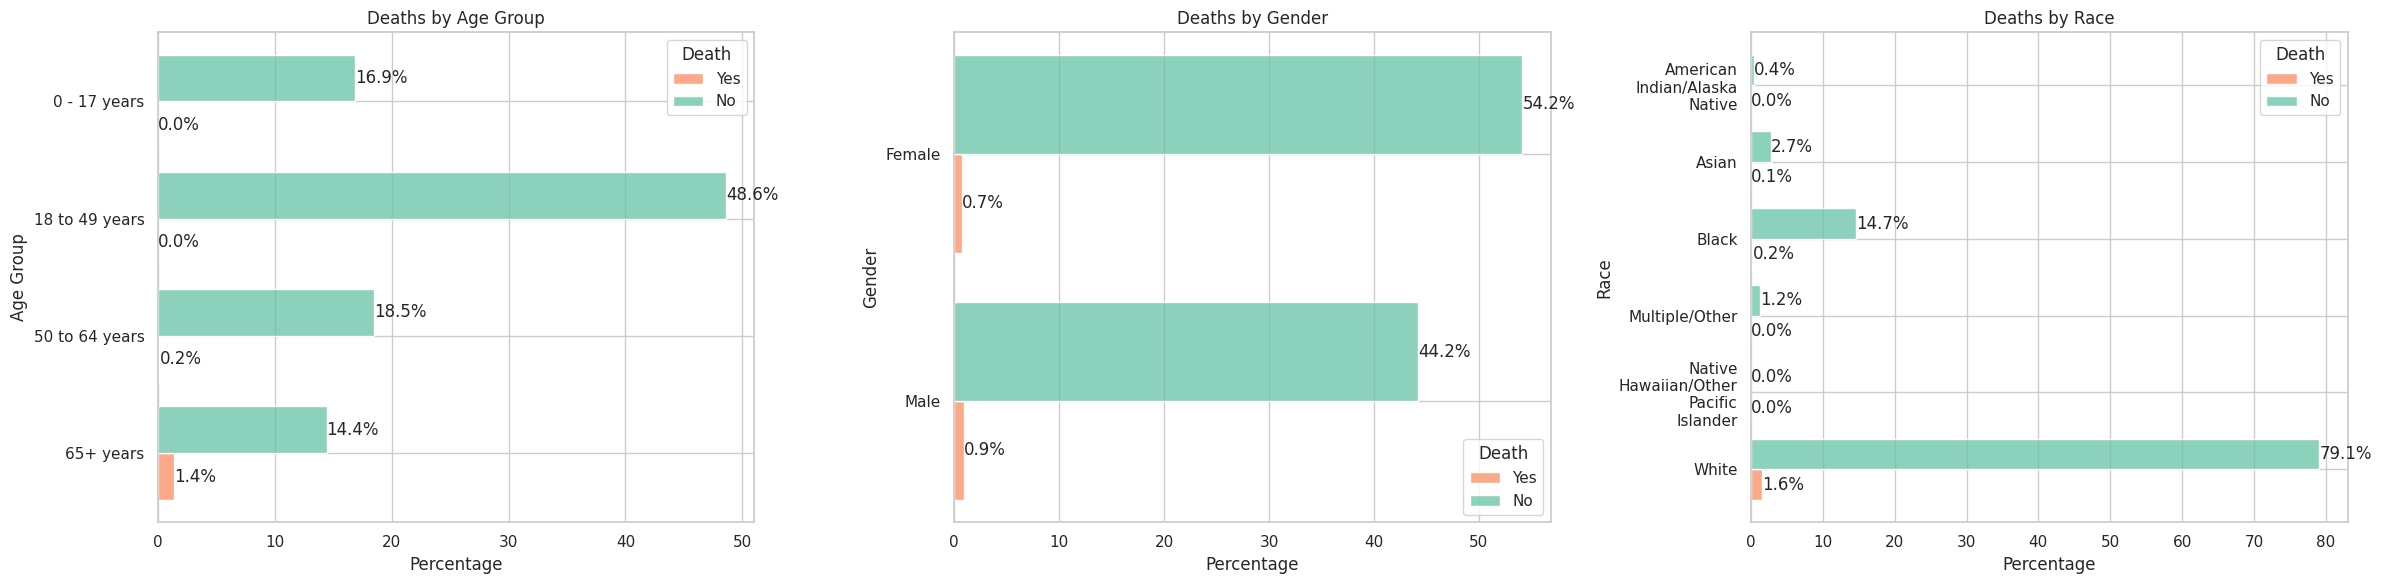
- Patients from age group 65+ years are more likely to die from covid relative to other age groups, 18-40 are less likely(lower death rate)
- Male patients are more likely to die from covid where females had less death rate 
- For race, we can note white have higher death rates

<h2>What percent of patients who have reported exposure to any kind of travel /
or congregation within the 14 days prior to illness onset end up hospitalized?
What percent of those go on to be hospitalized?</h2>

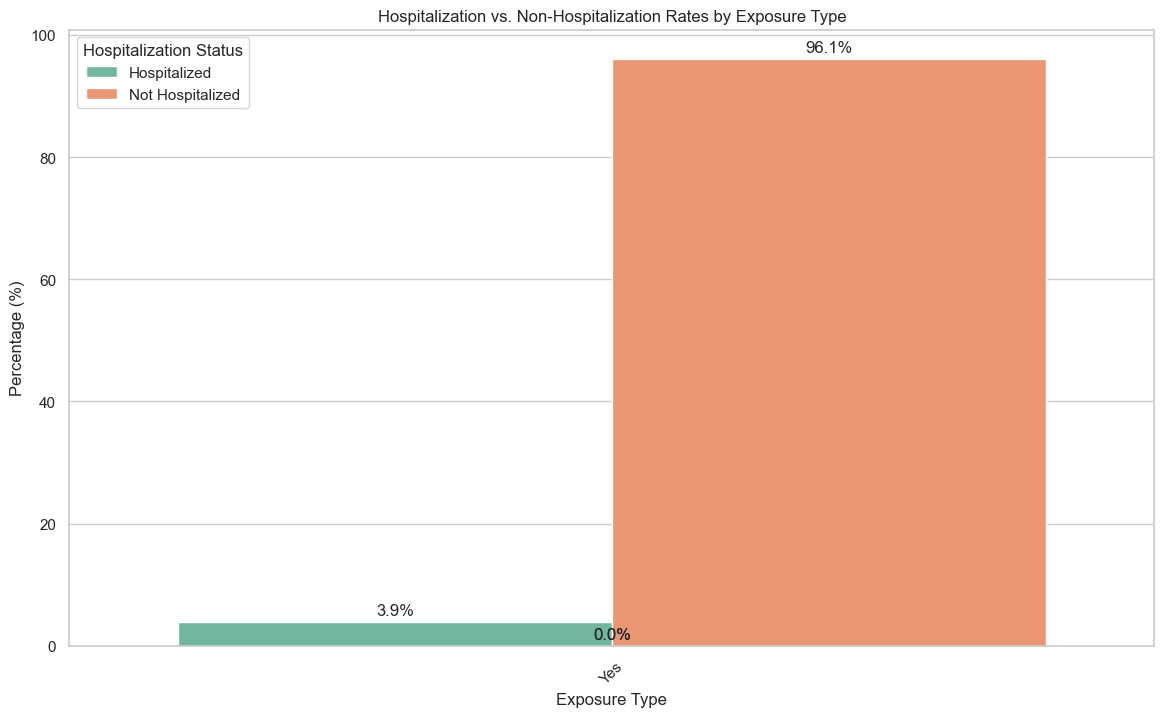

In [98]:
filtered_data = covid_data[~covid_data['exposure_yn'].isin(['Unknown', 'Missing'])]

exposure_hospitalization_stats = filtered_data.groupby('exposure_yn').agg(
    hosp_count=pd.NamedAgg(column='hosp_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='exposure_yn', aggfunc='count')
).reset_index()

exposure_hospitalization_stats['hosp_rate'] = (exposure_hospitalization_stats['hosp_count'] / exposure_hospitalization_stats['total_count']) * 100
exposure_hospitalization_stats['non_hosp_rate'] = 100 - exposure_hospitalization_stats['hosp_rate']

stacked_data = exposure_hospitalization_stats.melt(id_vars='exposure_yn', value_vars=['hosp_rate', 'non_hosp_rate'], var_name='Hospitalization Status', value_name='Percentage')

stacked_data['Hospitalization Status'] = stacked_data['Hospitalization Status'].map({'hosp_rate': 'Hospitalized', 'non_hosp_rate': 'Not Hospitalized'})

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data=stacked_data, x='exposure_yn', y='Percentage', hue='Hospitalization Status', ax=ax, palette='Set2')

for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
    
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Exposure Type')
ax.set_title('Hospitalization vs. Non-Hospitalization Rates by Exposure Type')
plt.xticks(rotation=45)
plt.legend(title='Hospitalization Status')
plt.show()




<b> We can note that about 4% of those who reported travel 14-days prior to their illness end up hospitalized</b>

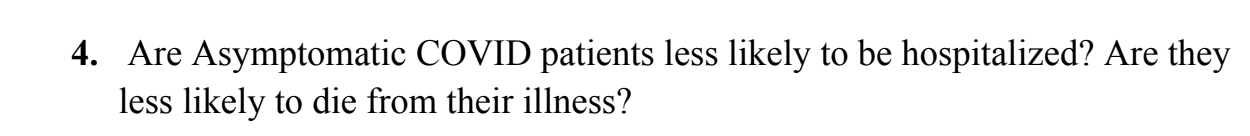

In [ ]:
# Filter data
asymptomatic_data = covid_data[(covid_data['symptom_status'] == 'Asymptomatic') & (~covid_data['symptom_status'].isin(['Unknown', 'Missing']))]
symptomatic_data = covid_data[(covid_data['symptom_status'] == 'Symptomatic') & (~covid_data['symptom_status'].isin(['Unknown', 'Missing']))]

# Calculate hospitalization and death rates for asymptomatic patients
asymptomatic_hospitalization_rate = (asymptomatic_data['hosp_yn'] == 'Yes').mean() * 100
asymptomatic_death_rate = (asymptomatic_data['death_yn'] == 'Yes').mean() * 100

# Calculate hospitalization and death rates for symptomatic patients
symptomatic_hospitalization_rate = (symptomatic_data['hosp_yn'] == 'Yes').mean() * 100
symptomatic_death_rate = (symptomatic_data['death_yn'] == 'Yes').mean() * 100

print("Hospitalization and Death Rates:")
print(f"Asymptomatic Patients - Hospitalization Rate: {asymptomatic_hospitalization_rate:.2f}%, Death Rate: {asymptomatic_death_rate:.2f}%")
print(f"Symptomatic Patients - Hospitalization Rate: {symptomatic_hospitalization_rate:.2f}%, Death Rate: {symptomatic_death_rate:.2f}%")


Hospitalization and Death Rates:
Asymptomatic Patients - Hospitalization Rate: 3.15%, Death Rate: 0.37%
Symptomatic Patients - Hospitalization Rate: 4.83%, Death Rate: 0.52%


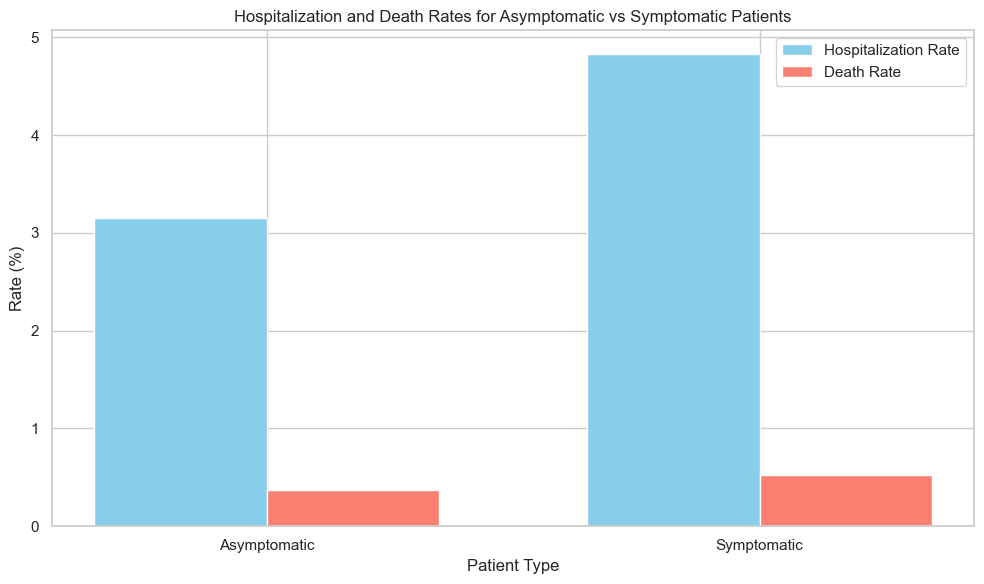

In [ ]:
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = [1, 2]

# Define data
hospitalization_rates = [asymptomatic_hospitalization_rate, symptomatic_hospitalization_rate]
death_rates = [asymptomatic_death_rate, symptomatic_death_rate]

# Plot hospitalization rates
plt.bar(index, hospitalization_rates, bar_width, label='Hospitalization Rate', color='skyblue')

# Plot death rates
plt.bar([i + bar_width for i in index], death_rates, bar_width, label='Death Rate', color='salmon')

plt.xlabel('Patient Type')
plt.ylabel('Rate (%)')
plt.title('Hospitalization and Death Rates for Asymptomatic vs Symptomatic Patients')
plt.xticks([i + bar_width / 2 for i in index], ['Asymptomatic', 'Symptomatic'])
plt.legend()

plt.tight_layout()
plt.show()

From the analysis, we can see that the hospitalization and death rates for asymptomatic patients are lower than those for symptomatic patients. This suggests that asymptomatic patients may have a milder form of the disease compared to symptomatic patients.

In [138]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the survey data containing information about how EIPs were used by state
df = pd.read_csv('pulse_puf_most_recent.csv', usecols=['est_st', 'eip'], dtype={'est_st': 'str', 'eip': 'category'})





In [141]:
print(df.info())
print(df.shape)
print("Categories for 'expctloss':", df["eip"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   est_st  1088314 non-null  object  
 1   eip     549361 non-null   category
dtypes: category(1), object(1)
memory usage: 9.3+ MB
None
(1088314, 2)
Categories for 'expctloss': Index(['-99', '1', '2', '3', '4'], dtype='object')


In [ ]:
survey_data = df

In [175]:

import pandas as pd
import plotly.express as px

# Sample Data Preparation (replace with your actual data loading)
filtered_data = survey_data[~survey_data['eip'].isin([-88, -99, 4])]
state_counts = survey_data.groupby('state')['eip'].count()
eip_counts = filtered_data.groupby('state')['eip'].count()

# Sample data for demonstration purposes
data = {
    'state': survey_data['state'].unique(),
    'eip_counts': eip_counts,
    'state_counts': state_counts
}
survey_data = pd.DataFrame(data)

# Calculating the percentage of EIP recipients for each state
survey_data['eip_percentage'] = (survey_data['eip_counts'] / survey_data['state_counts']) * 100

# Create a choropleth map
fig = px.choropleth(
    survey_data,
    locations='state', 
    locationmode='USA-states', 
    color='eip_percentage',
    hover_name='state',
    hover_data=['eip_percentage'],
    color_continuous_scale='Blues',
    scope='usa',
    labels={'eip_percentage': 'EIP Percentage'}
)

fig.update_layout(
    title_text='Percentage of EIP Recipients by State',
    geo=dict(
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()


# Calculate the percentage of EIP recipients for each state
state_percentages = (eip_counts / state_counts)*100
# print(state_percentages)
# Find the state with the highest percentage of EIP recipients
highest_percentage_state = state_percentages.idxmax(-1)
highest_percentage = state_percentages.max()

print(f"The state with the highest percentage of EIP recipients is {highest_percentage_state} "
      f"with {highest_percentage:.2f}% ")





The state with the highest percentage of EIP recipients is WV with 88.42% 


<h2>2.2.1 What is the relationship between age group and ICU admission rates?</h2>

In [85]:
df = pd.read_csv("/Users/mohamedghaith/Documents/Uni/Stat/Project/data.csv", 
                usecols=["age_group","case_month","icu_yn"],
                dtype={"age_group": "category", "icu_yn": "category", "case_month": "category"})

df = df[(df["icu_yn"] != "Unknown") & (df["icu_yn"] != "Missing")]
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["icu_yn"] = df["icu_yn"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()

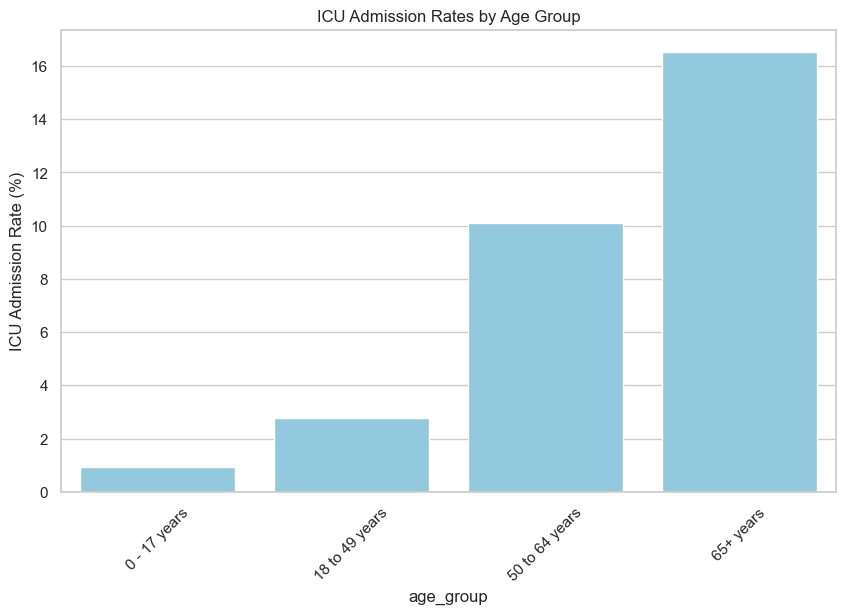

In [94]:
# Group data by age group and calculate ICU admission rates
icu_stats = df.groupby('age_group').agg(
    icu_count=pd.NamedAgg(column='icu_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='age_group', aggfunc='count')
).reset_index()

icu_stats['icu_rate'] = (icu_stats['icu_count'] / icu_stats['total_count']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=icu_stats, x='age_group', y='icu_rate', ax=ax, color='skyblue')

ax.set_ylabel('ICU Admission Rate (%)')
ax.set_title('ICU Admission Rates by Age Group')
race_plot = sns.histplot(data=df, y="age_group", hue="icu_yn", multiple="dodge",
                         shrink=.8, stat="percent", palette="Set2", ax=axes[2], legend=False)
plt.xticks(rotation=45)
plt.show()


We can note a general trend with higher icu addmision rate increasing as we go from higher age group to lower

- <h2>2.2.2 How does symptom status impact the rate of icu admmitance</h2>


In [ ]:
# Filter data
asymptomatic_data = covid_data[(covid_data['symptom_status'] == 'Asymptomatic') & (~covid_data['symptom_status'].isin(['Unknown', 'Missing']))]
symptomatic_data = covid_data[(covid_data['symptom_status'] == 'Symptomatic') & (~covid_data['symptom_status'].isin(['Unknown', 'Missing']))]

# Calculate hospitalization and death rates for asymptomatic patients
asymptomatic_icu_rate = (asymptomatic_data['icu_yn'] == 'Yes').mean() * 100

# Calculate hospitalization and death rates for symptomatic patients
symptomatic_icu_rate = (symptomatic_data['icu_yn'] == 'Yes').mean() * 100
print("Hospitalization and Death Rates:")
print(f"Asymptomatic Patients - Hospitalization Rate: {asymptomatic_icu_rate:.2f}% ")
print(f"Symptomatic Patients - Hospitalization Rate: {symptomatic_icu_rate:.2f}%")


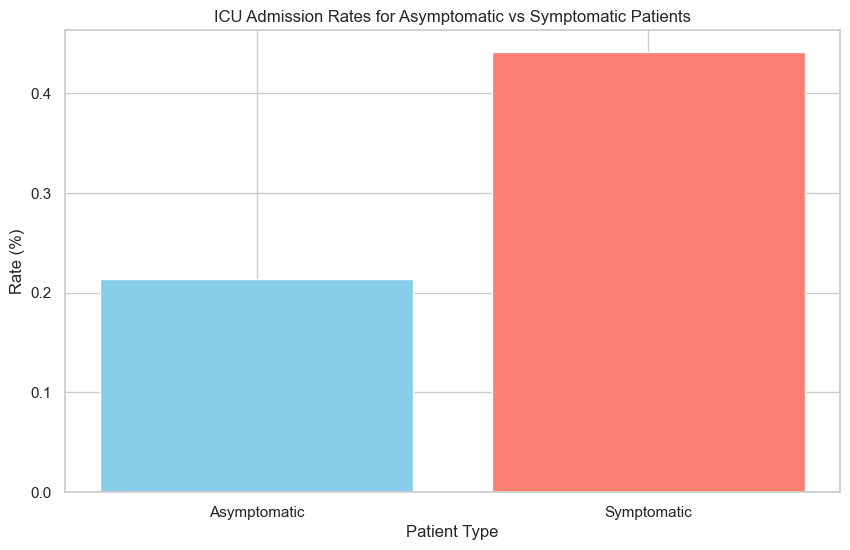

In [105]:
#plot rates of icu admission for symptomatic and asymptomatic patients
plt.figure(figsize=(10, 6))
plt.bar(["Asymptomatic", "Symptomatic"], [asymptomatic_icu_rate, symptomatic_icu_rate], color=['skyblue', 'salmon'])
plt.xlabel('Patient Type')
plt.ylabel('Rate (%)')
plt.title('ICU Admission Rates for Asymptomatic vs Symptomatic Patients')
plt.show()


<h4>We can note a much greater icu addmision rate for Symptomatic patients. This tells that they have much highe probability to suffer from severe covid symptoms</h4>

<h2>2.2.3 How does the length of time between symptom onset and first positive test correlate with hospitalization rates?</h2>

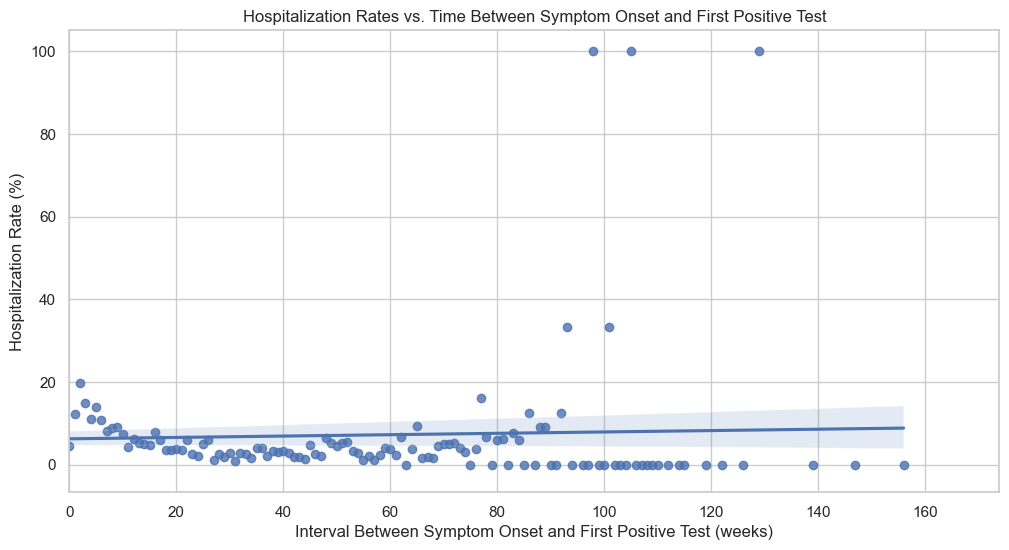

In [113]:
# Calculate hospitalization rates based on the time between symptom onset and first positive test
interval_stats = covid_data.groupby('case_onset_interval').agg(
    hosp_count=pd.NamedAgg(column='hosp_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='hosp_yn', aggfunc='count')
).reset_index()

interval_stats['hosp_rate'] = (interval_stats['hosp_count'] / interval_stats['total_count']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(data=interval_stats, x='case_onset_interval', y='hosp_rate', ax=ax)

ax.set_xlabel('Interval Between Symptom Onset and First Positive Test (weeks)')
ax.set_ylabel('Hospitalization Rate (%)')
ax.set_title('Hospitalization Rates vs. Time Between Symptom Onset and First Positive Test')
x_min, x_max = ax.get_xlim()
ax.set_xlim(0, x_max)
plt.show()


We can note that longer intervals between symptom onset and first positive test are related to higher hospitalization rates. Early testing and diagnosis might help reduce severe outcomes.

<h2>2.2.4 What is the rate of patients who are dead after icu admmission</h2>

In [117]:
df = pd.read_csv("/Users/mohamedghaith/Documents/Uni/Stat/Project/data.csv", 
                usecols=["death_yn","case_month","icu_yn"],
                dtype={"death_yn": "category", "icu_yn": "category", "case_month": "category"})

df = df[(df["icu_yn"] != "Unknown") & (df["icu_yn"] != "Missing")]
df = df[(df["death_yn"] != "Unknown") & (df["death_yn"] != "Missing")]
df = df[(df["case_month"] != "Unknown") & (df["case_month"] != "Missing")]
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()
df["icu_yn"] = df["icu_yn"].cat.remove_unused_categories()
df["case_month"] = df["case_month"].cat.remove_unused_categories()

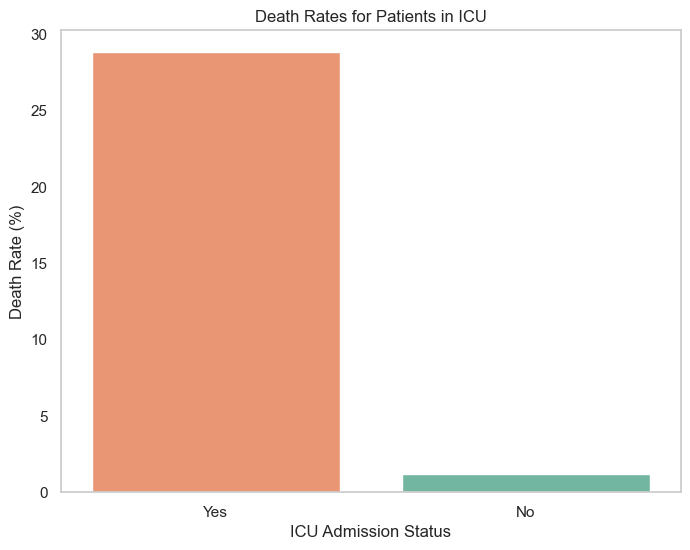

In [130]:
#plottting death rates for patients in icu
icu_death_stats = df.groupby('icu_yn').agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='icu_yn', aggfunc='count')
).reset_index()

icu_death_stats['death_rate'] = (icu_death_stats['death_count'] / icu_death_stats['total_count']) * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=icu_death_stats, x='icu_yn', y='death_rate', ax=ax, palette='Set2', dodge=False, order=['Yes', 'No'], hue='icu_yn', )
plt.title('Death Rates for Patients in ICU')
plt.ylabel('Death Rate (%)')
plt.xlabel('ICU Admission Status')
plt.grid(False)
plt.show()


<h4>We can note that confirmed death percentage for patients who were admitted to the icu is much higher than those who didn't. We can deduce that patients enter the icu at a very severe condition and should be reported earlier</h4>

<h2>2.2.5 What is the impact of symptom onset interval on death rates?</h2>

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Filter out missing or unknown values if necessary
filtered_data = covid_data[~covid_data['case_onset_interval'].isin(['Unknown', 'Missing'])]

# Group data by symptom onset interval and calculate death rates
onset_interval_stats = filtered_data.groupby('case_onset_interval').agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='death_yn', aggfunc='count')
).reset_index()

# Calculate the death rate
onset_interval_stats['death_rate'] = (onset_interval_stats['death_count'] / onset_interval_stats['total_count']) * 100

# Sorting the data by onset interval for better visualization
onset_interval_stats = onset_interval_stats.sort_values(by='case_onset_interval')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Assuming covid_data is your DataFrame and already loaded
# Replace this with your actual data loading code

# Filter out missing or unknown values if necessary
filtered_data = covid_data[~covid_data['case_onset_interval'].isin(['Unknown', 'Missing'])]

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

# Assuming covid_data is your DataFrame and already loaded
# Replace this with your actual data loading code

# Filter out missing or unknown values if necessary
filtered_data = covid_data[~covid_data['case_onset_interval'].isin(['Unknown', 'Missing'])]

# Group data by symptom onset interval and calculate death rates
onset_interval_stats = filtered_data.groupby('case_onset_interval').agg(
    death_count=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_count=pd.NamedAgg(column='death_yn', aggfunc='count')
).reset_index()



In [185]:

onset_interval_stats['death_rate'] = (onset_interval_stats['death_count'] / onset_interval_stats['total_count']) * 100


onset_interval_stats = onset_interval_stats.sort_values(by='case_onset_interval')


fig = px.scatter(onset_interval_stats, x='case_onset_interval', y='death_rate', title='Death Rates by Symptom Onset Interval',
                 labels={'case_onset_interval': 'Weeks Between Symptom Onset and First Positive Test', 'death_rate': 'Death Rate (%)'},
                 trendline='ols', trendline_color_override='red')

fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(showlegend=False)

fig.show()

<h4>We can note no difference significant change or upgoing trendline for the death rate 
along with number of Weeks Between Symptom Onset and First Positive Tes </h4>